In [52]:
import pandas as pd
from sklearn import cluster
from sklearn.decomposition import PCA
import pylab as pl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [4]:
"""
too lazy to check for xlxs
PLease convert the XLSX to csv and use this code
"""
survey_raw_df = pd.read_csv('/Users/agowda/Downloads/Hospital Data.csv')

/Users/agowda/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,66,73,185,223) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
"""
To check amount of NA values in any given column
-----
Usage
-----

count_na_in_col('URL')

"""
def count_na_in_col(colname):
    return(sum(pd.isnull(survey_raw_df[colname])))

In [48]:
# Example:
    
count_na_in_col('GENBD')
count_na_in_col('PEDBD')
count_na_in_col('OBBD')
count_na_in_col('ACULTBD')
count_na_in_col('PSYBD')
count_na_in_col('ALCHBD')
count_na_in_col('BRNBD')
count_na_in_col('MSICBD')

1500

In [77]:
"""
Add your variables here
"""
bed_df = survey_raw_df[['GENBD','PEDBD','OBBD','ACULTBD','PSYBD','ALCHBD','BRNBD','MSICBD']]
bed_df = bed_df.fillna(bed_df.mean())

In [78]:
max(bed_df['GENBD'])

1187.0

In [79]:

np.any(np.isnan(bed_df))

False

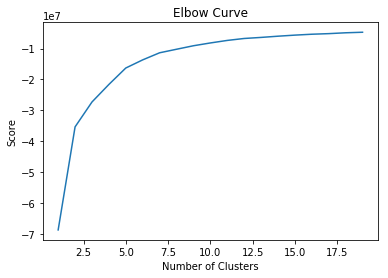

In [86]:
Nc = range(1, 20)
kmeans = [cluster.KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(bed_df).score(bed_df) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [87]:
number_of_cluster = 5

kmeans= cluster.KMeans(n_clusters=number_of_cluster)
kmeans.fit(bed_df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

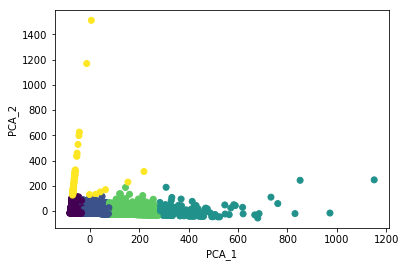

In [88]:
pca = PCA(n_components=2).fit(bed_df)
pca_2d = pca.transform(bed_df)
pl.figure('K_means with{n}'.format(n=number_of_cluster))
pl.scatter(pca_2d[:, 0], pca_2d[:, 1],c=kmeans.labels_)
pl.xlabel("PCA_1")
pl.ylabel("PCA_2")
pl.show()

In [89]:
pd.DataFrame(pca.components_,columns=bed_df.columns,index = ['PC-1','PC-2'])


,GENBD,PEDBD,OBBD,ACULTBD,PSYBD,ALCHBD,BRNBD,MSICBD
PC-1,0.981165,0.056750,0.122379,-0.015672,0.054769,0.003751,0.005004,0.125835
PC-2,-0.054809,0.004881,-0.011650,-0.012776,0.998000,0.025771,0.002199,-0.000328


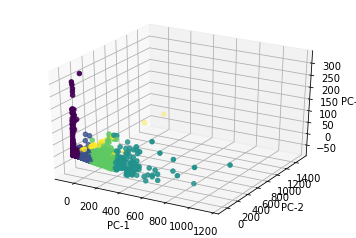

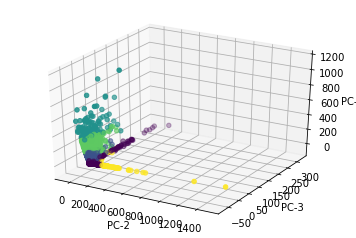

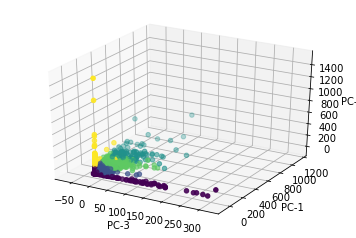

,GENBD,PEDBD,OBBD,ACULTBD,PSYBD,ALCHBD,BRNBD,MSICBD
PC-1,0.981165,0.056750,0.122379,-0.015672,0.054769,0.003751,0.005004,0.125835
PC-2,-0.054809,0.004881,-0.011650,-0.012776,0.998000,0.025771,0.002199,-0.000328
PC-3,-0.077484,0.986600,0.139151,-0.019021,-0.007576,-0.005710,0.014325,0.024416


In [94]:
# 3 Dimensional PCA variables
"""
Change composition of bed_df
bed_df = survey_raw_df[['GENBD','PEDBD','OBBD','ACULTBD']]
bed_df = bed_df.fillna(bed_df.mean())

"""
pca_3 = PCA(n_components=3).fit(bed_df)
pca_3d = pca_3.transform(bed_df)
angle_1 = plt.figure()
ax = angle_1.add_subplot(111, projection='3d')
ax.scatter(pca_3d[:, 0], pca_3d[:, 1],pca_3d[:,2], c=kmeans.labels_, marker='o')
ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')

angle_2 = plt.figure()
ax = angle_2.add_subplot(111, projection='3d')
ax.scatter(pca_3d[:, 1], pca_3d[:, 2],pca_3d[:,0], c=kmeans.labels_, marker='o')
ax.set_xlabel('PC-2')
ax.set_ylabel('PC-3')
ax.set_zlabel('PC-1')

angle_3 = plt.figure()
ax = angle_3.add_subplot(111, projection='3d')
ax.scatter(pca_3d[:, 2], pca_3d[:, 0],pca_3d[:,1], c=kmeans.labels_, marker='o')
ax.set_xlabel('PC-3')
ax.set_ylabel('PC-1')
ax.set_zlabel('PC-2')

plt.show()
pd.DataFrame(pca_3.components_,columns=bed_df.columns,index = ['PC-1','PC-2','PC-3'])


In [91]:
pca_3.explained_variance_ratio_

array([ 0.77426769,  0.16787487,  0.02425689])

In [96]:
pca_vs_features = pd.DataFrame(pca_3.components_,columns=bed_df.columns,index = ['PC-1','PC-2','PC-3'])


In [99]:
pca_vs_features[1,]

KeyError: (1,)